<a href="https://colab.research.google.com/github/YounSooKimTech/NLP_Power/blob/main/The_time_diff_btw_org_and_reply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/NLP_Power/main/Enron_merged_df.csv')
df.fillna('', inplace=True)

df_re = df[df["Subject"].str.startswith("RE:")]
df_re = df_re.reset_index(drop=True)

print(df.shape, df_re.shape)

import warnings
warnings.filterwarnings("ignore")



(2021, 20) (73, 20)


In [2]:
import pandas as pd
re = ["RE:", "re:"]

df_re1 = df[df["Subject"].str.startswith(tuple(re))]
df_re1 = df_re.reset_index(drop=True)

print(df_re.shape, df_re.shape, df_re1.shape)


(73, 20) (73, 20) (73, 20)


In [4]:
df_temp = df[df["Subject"].str.startswith("Re:")]
# df_temp["Subject"].value_counts()

In [5]:
df_re_org = df_re[["message", "direction"]]

df_re_org["re"] = df_re["message"].str.split(' -----Original Message-----|---------------------- Forwarded|\n\n\n\n', expand=True)[0]
df_re_org["org"] = df_re["message"].str.split(' -----Original Message-----|---------------------- Forwarded|\n\n\n\n', expand=True)[1]

df_re_org['index_column'] = range(0, len(df_re_org))

# Set the new column as the index
df_re_org = df_re_org.set_index('index_column')

print(df_re_org.shape)

df_re_org['org'] = df_re_org['org'].astype(str)
df_re_org['re'] = df_re_org['re'].astype(str)


(73, 4)


In [6]:
# original information
import re

def get_from(x):
    match = re.search(r"From:\s+(.*)\s+Sent:", x)
    return match.group(1).strip() if match else ''

def get_sent(x):
    match = re.search(r"Sent:\s+(.*)\s+To:", x)
    return match.group(1).strip() if match else ''

def get_to(x):
    match = re.search(r"To:\s+(.*)\s+Subject:", x)
    return match.group(1).strip() if match else ''

def get_subject(x):
    match = re.search(r"Subject:\s+(.*)\s+", x)
    return match.group(1).strip() if match else ''

df_re_org['Org_Sent'] = df_re_org['org'].apply(get_sent)
df_re_org['Org_From'] = df_re_org['org'].apply(get_from)
df_re_org['Org_To'] = df_re_org['org'].apply(get_to)
df_re_org['Org_Subject'] = df_re_org['org'].apply(get_subject)


In [7]:
# reply information

import re

def get_from(x):
    match = re.search(r"From:\s+(.*)\s+Sent:", x)
    return match.group(1).strip() if match else ''

def get_date(x):
    match = re.search(r"\w{3}, \d{2} \w{3} \d{4} \d{2}:\d{2}:\d{2} [+-]\d{4} \(\w{3}\)", x)
    return match.group().strip() if match else ''
    
def get_to(x):
    match = re.search(r"To:\s+(.*)\s+Subject:", x)
    return match.group(1).strip() if match else ''

def get_subject(x):
    match = re.search(r"Subject:\s+(.*)\s+", x)
    return match.group(1).strip() if match else ''

df_re_org['RE_Sent'] = df_re_org['re'].apply(get_date)
df_re_org['RE_From'] = df_re_org['re'].apply(get_from)
df_re_org['RE_To'] = df_re_org['re'].apply(get_to)
df_re_org['RE_Subject'] = df_re_org['re'].apply(get_subject)


In [8]:
df_result = df_re_org
df_result = df_result.fillna('')
df_result = df_result.rename(columns={'direction': 'reply_direction'})

In [9]:
# convert to UTC in reply

import pandas as pd
from datetime import datetime, timezone

def convert_to_utc(date_str):
    if not date_str:
        return None
    # Remove the timezone string
    date_str_no_tz = re.sub(r'\s*\([^)]*\)', '', date_str)
    # Parse the date string
    date_obj = datetime.strptime(date_str_no_tz, '%a, %d %b %Y %H:%M:%S %z')
    # Set the timezone to UTC
    date_obj_utc = date_obj.astimezone(timezone.utc)
    # Format the date string in the desired format
    return date_obj_utc.strftime('%Y-%m-%d %H:%M')

# Apply the function to the Sent_Date column and create a new column with the converted dates
df_result['RE_Sent_GTC'] = df_result['RE_Sent'].apply(convert_to_utc)


# Change ORG date format
import pandas as pd
from datetime import datetime

# define the function to parse and format the date
def parse_date(date_str):
    if not date_str:
        return None
    date_obj = datetime.strptime(date_str, '%A, %B %d, %Y %I:%M %p')
    formatted_date_str = date_obj.strftime('%Y-%m-%d %H:%M')
    return formatted_date_str

# apply the function to the Org_Sent column
df_result['Org_Sent_Converted'] = df_result['Org_Sent'].apply(parse_date)


In [11]:
df_result

,message,reply_direction,re,org,Org_Sent,Org_From,Org_To,Org_Subject,RE_Sent,RE_From,RE_To,RE_Subject,RE_Sent_GTC,Org_Sent_Converted
index_column,,,,,,,,,,,,,,
0,Message-ID: <30715742.1075857656172.JavaMail.e...,same,Message-ID: <30715742.1075857656172.JavaMail.e...,"\nFrom: Arnold, John \nSent: Thursday, Febru...","Thursday, February 15, 2001 12:43 PM","Arnold, John","Zipper, Andy",Andy:,"Thu, 15 Feb 2001 05:39:00 -0800 (PST)",,andy.zipper@enron.com,RE:,2001-02-15 13:39:00,2001-02-15 12:43:00
1,Message-ID: <24452992.1075857692102.JavaMail.e...,downward,Message-ID: <24452992.1075857692102.JavaMail.e...,"\nFrom: \tZipper, Andy \nSent:\tMonday, April...","Monday, April 30, 2001 1:40 PM","Zipper, Andy","Lavorato, John",RE: DRAFT PRESS RELEASE: Enron to Provide Data...,"Mon, 30 Apr 2001 11:50:13 -0700 (PDT)",,andy.zipper@enron.com,RE: DRAFT PRESS RELEASE: Enron to Provide Data...,2001-04-30 18:50:00,2001-04-30 13:40:00
2,Message-ID: <15579767.1075860197121.JavaMail.e...,upward,Message-ID: <15579767.1075860197121.JavaMail.e...,=09Andy Zipper/ENRON@enronXgate\n=0903/15/2001...,,,,RE: (01-91) Exchange Selects GlobalView Softwa...,"Thu, 15 Mar 2001 02:00:00 -0800 (PST)",,andy.zipper@enron.com,RE: (01-91) Exchange Selects GlobalView Softwa...,2001-03-15 10:00:00,NaT
3,Message-ID: <26955589.1075857692630.JavaMail.e...,downward,Message-ID: <26955589.1075857692630.JavaMail.e...,"\nFrom: \tTycholiz, Barry \nSent:\tTuesday, F...","Tuesday, February 06, 2001 7:43 AM","Tycholiz, Barry","Lavorato, John J.",EOL Summary report,,,barry.tycholiz@enron.com,RE: EOL Summary report,NaT,2001-02-06 07:43:00
4,Message-ID: <897530.1075857694572.JavaMail.eva...,downward,Message-ID: <897530.1075857694572.JavaMail.eva...,"\nFrom: \tTycholiz, Barry \nSent:\tMonday, Ap...","Monday, April 23, 2001 3:52 PM","Tycholiz, Barry","Lavorato, John",No Subject,"Mon, 23 Apr 2001 16:00:53 -0700 (PDT)",,barry.tycholiz@enron.com,RE: No Subject,2001-04-23 23:00:00,2001-04-23 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Message-ID: <973929.1075857694010.JavaMail.eva...,downward,Message-ID: <973929.1075857694010.JavaMail.eva...,"\nFrom: \tBelden, Tim \nSent:\tWednesday, Feb...","Wednesday, February 14, 2001 2:18 PM","Belden, Tim",,L-P letter,"Mon, 19 Feb 2001 08:41:30 -0800 (PST)",,tim.belden@enron.com,RE: L-P letter,2001-02-19 16:41:00,2001-02-14 14:18:00
69,Message-ID: <15423309.1075857694289.JavaMail.e...,downward,Message-ID: <15423309.1075857694289.JavaMail.e...,"\nFrom: \tBelden, Tim \nSent:\tMonday, March ...","Monday, March 05, 2001 2:26 PM","Belden, Tim","Lavorato, John",Middle Market,"Mon, 12 Mar 2001 05:30:00 -0800 (PST)",,tim.belden@enron.com,RE: Middle Market,2001-03-12 13:30:00,2001-03-05 14:26:00
70,Message-ID: <18987828.1075857695423.JavaMail.e...,downward,Message-ID: <18987828.1075857695423.JavaMail.e...,"\nFrom: \tBelden, Tim \nSent:\tWednesday, Feb...","Wednesday, February 14, 2001 5:25 PM","Belden, Tim","Lavorato, John; White, Stacey; Beck, Sally; Be...",Potential Gas System Exposure,"Mon, 19 Feb 2001 08:34:11 -0800 (PST)",,tim.belden@enron.com,RE: Potential Gas System Exposure,2001-02-19 16:34:00,2001-02-14 17:25:00


In [14]:
# get the time difference

import pandas as pd

# Convert the datetime columns to datetime data type
df_result["RE_Sent_GTC"] = pd.to_datetime(df_result["RE_Sent_GTC"])
df_result["Org_Sent_Converted"] = pd.to_datetime(df_result["Org_Sent_Converted"])

# Calculate the time difference in minutes
df_result["diff"] = (df_result["RE_Sent_GTC"] - df_result["Org_Sent_Converted"]).dt.total_seconds() / 60


In [17]:
# mean value comparison
print(df_result.shape, "\n\n")

print(df_result["reply_direction"].value_counts(), "\n\n")

print(df_result.groupby("reply_direction")["diff"].mean().round(2))
print("\n\n")

print(df_result.groupby("reply_direction")["diff"].std().round(2))



(73, 15) 


downward    47
same        16
upward      10
Name: reply_direction, dtype: int64 


reply_direction
downward    2244.48
same         520.14
upward      1117.50
Name: diff, dtype: float64



reply_direction
downward    3049.63
same         486.29
upward       419.31
Name: diff, dtype: float64


(34, 15)
reply_direction
downward     653.0
same         483.0
upward      1117.5
Name: diff, dtype: float64
KruskalResult(statistic=2.5213936430317903, pvalue=0.28345643912059854)


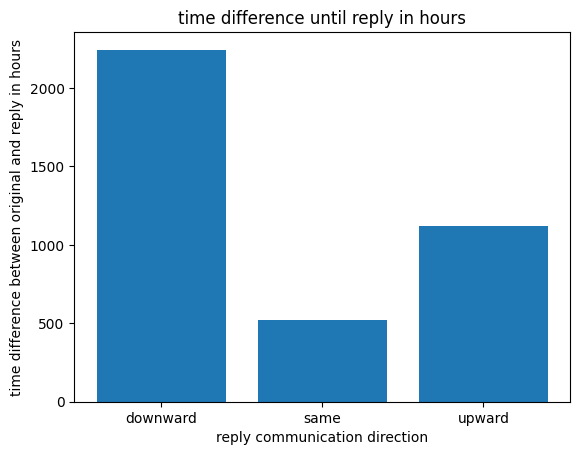

In [18]:
# ANOVA TEST

df_result = df_result.dropna(subset="diff")
print(df_result.shape)
print(df_result.groupby("reply_direction")["diff"].median())


up_group = df_result[df_result["reply_direction"] == "upward"]["diff"]
same_group = df_result[df_result["reply_direction"] == "same"]["diff"]
down_group = df_result[df_result["reply_direction"] == "downward"]["diff"]

from scipy import stats
print(stats.kruskal(up_group, same_group, down_group))


import matplotlib.pyplot as plt
means =df_result.groupby('reply_direction')['diff'].mean()
plt.bar(means.index, means.values)
plt.title('time difference until reply in hours')
plt.xlabel('reply communication direction')
plt.ylabel('time difference between original and reply in hours')
plt.show()